In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O

# Visualization
import matplotlib.pyplot as plt

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier

In [ ]:
!pip install mglearn
import mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 5.3 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=942225e6b4dc2bf007980b685b36379cd7a4972dd5748c17bcd4653de2146cc5
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [ ]:
data = np.load("/content/drive/MyDrive/dataset/olivetti_faces.npy")
target = np.load("/content/drive/MyDrive/dataset/olivetti_faces_target.npy")

In [ ]:
print("Ada {} gambar dalam dataset".format(len(data)))
print("Ada {} class (orang) dalam dataset".format(len(np.unique(target))))
print("Ukuran gambar adalah {}x{}".format(data.shape[1], data.shape[2]))
print("Ukuran pixel direduksi ke interval [0, 1]. contoh : {}".format(data[0][0, :4]))

Ada 400 gambar dalam dataset
Ada 40 class (orang) dalam dataset
Ukuran gambar adalah 64x64
Ukuran pixel direduksi ke interval [0, 1]. contoh : [0.30991736 0.3677686  0.41735536 0.44214877]


In [ ]:
print("Penomoran gambar :", np.unique(target))

Penomoran gambar : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


In [ ]:
def wajah_orang(images, unique_ids):
    # Creating 4X10 subplots in  18x9 figure size
    fig, axarr = plt.subplots(nrows = 4, ncols = 10, figsize = (18, 9))
    # For easy iteration flattened 4X10 subplots matrix to 40 array
    axarr = axarr.flatten()
    
    # iterating over user ids
    for unique_id in unique_ids :
        image_index = unique_id*10
        axarr[unique_id].imshow(images[image_index], cmap='gray')
        axarr[unique_id].set_xticks([])
        axarr[unique_id].set_yticks([])
        axarr[unique_id].set_title("face id : {}".format(unique_id))
    plt.suptitle("40 wajah orang dalam dataset")

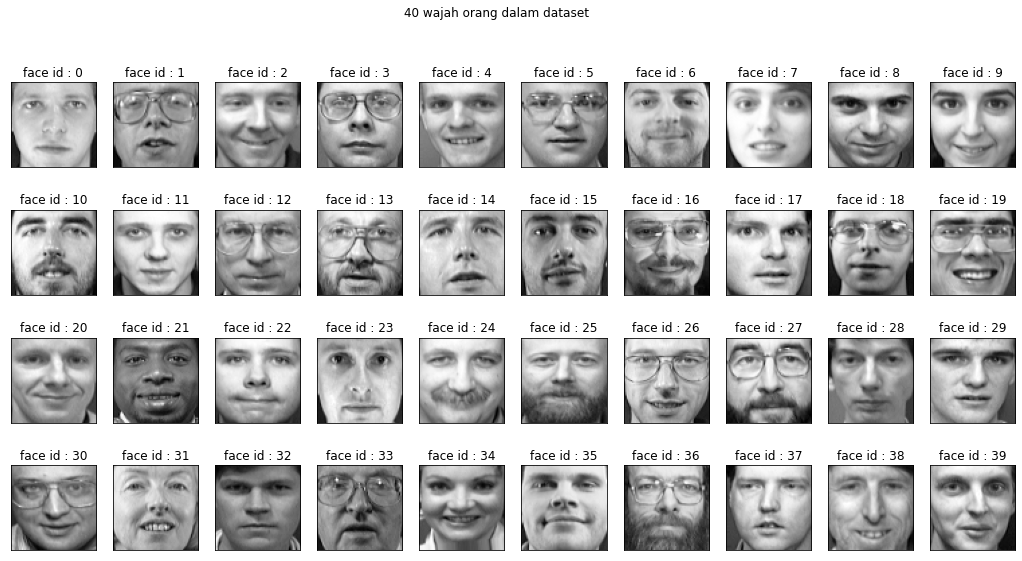

In [ ]:
wajah_orang(data, np.unique(target))

In [ ]:
def tampilkan_wajah(images, subject_ids):
    cols = 10 # setiap subjek memiliki 10 foto berbeda
    rows = (len(subject_ids)*10)/cols #
    rows = int(rows)
    
    fig, axarr = plt.subplots(nrows=rows, ncols=cols, figsize = (18, 9))
    # axarr = axarr.flatten()
    
    for i, subject_id in enumerate(subject_ids) :
        for j in range(cols):
            image_index=subject_id*10 + j
            axarr[i, j].imshow(images[image_index], cmap = "gray")
            axarr[i, j].set_xticks([])
            axarr[i, j].set_yticks([])
            axarr[i, j].set_title("face id : {}".format(subject_id))

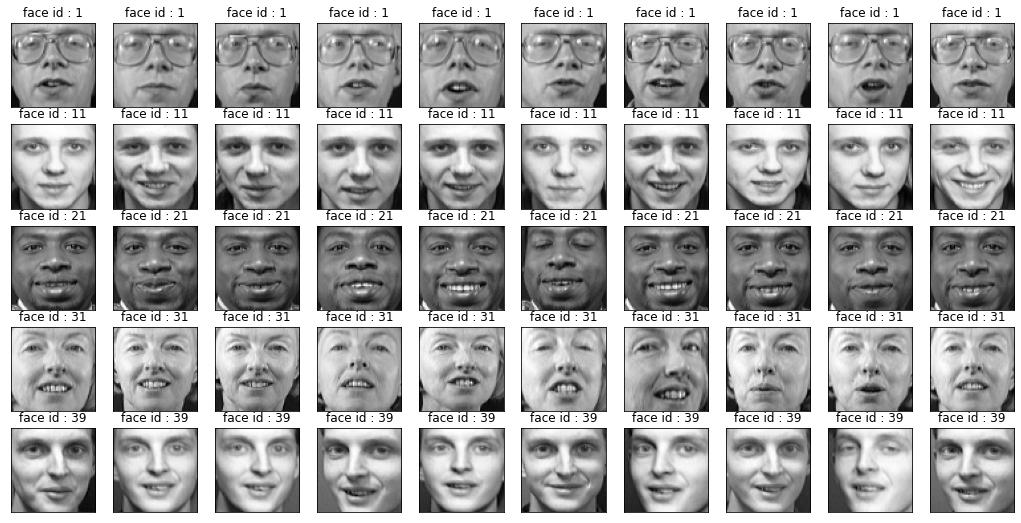

In [ ]:
# memilih wajah yang akan ditampilkan
tampilkan_wajah(images = data, subject_ids = [1, 11, 21, 31, 39])

In [ ]:
# mengubah dimensi
X = data.reshape((data.shape[0], data.shape[1]*data.shape[2]))
print("X shape :", X.shape)

X shape : (400, 4096)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.3, stratify = target, random_state = 0)
print("X_train shape :", X_train.shape)
print("y_train shape : {}".format(y_train.shape))

X_train shape : (280, 4096)
y_train shape : (280,)


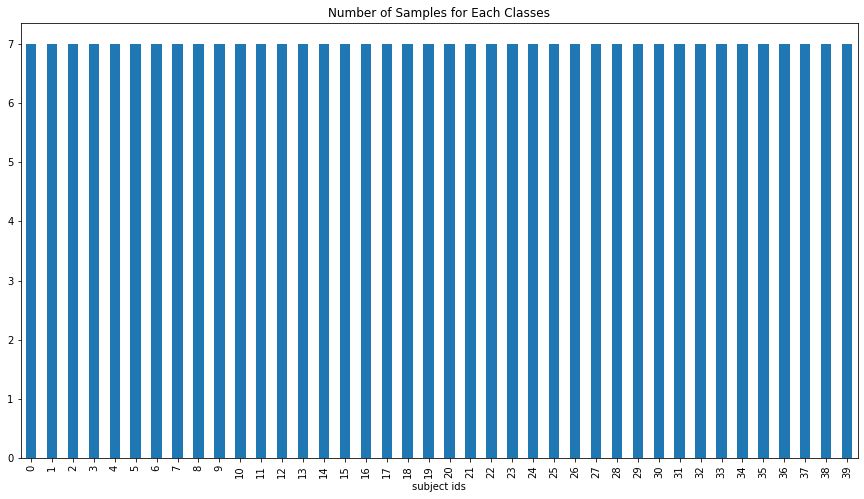

In [ ]:
y_frame = pd.DataFrame()
y_frame['subject ids'] = y_train
y_frame.groupby(['subject ids']).size().plot.bar(figsize = (15, 8), title = "Number of Samples for Each Classes")

# **PCA**

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)
X_pca = pca.transform(X)

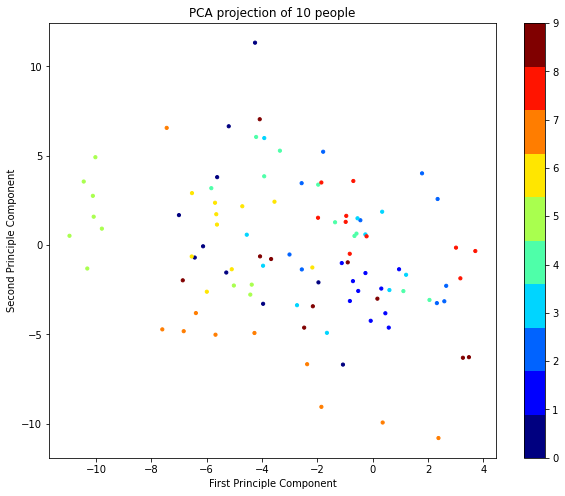

In [ ]:
number_of_people = 10
index_range = number_of_people*10
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(1, 1, 1)
scatter = ax.scatter(X_pca[:index_range, 0], X_pca[:index_range, 1], c = target[:index_range], s = 10, cmap = plt.get_cmap('jet', number_of_people))

ax.set_xlabel("First Principle Component")
ax.set_ylabel("Second Principle Component")
ax.set_title("PCA projection of {} people".format(number_of_people))

fig.colorbar(scatter)

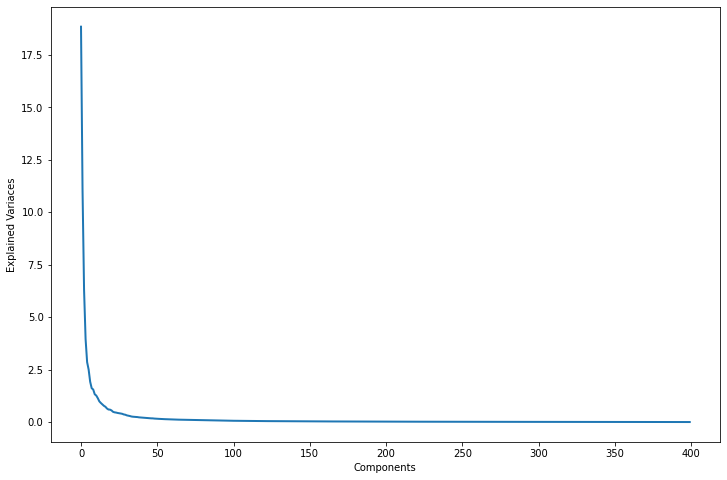

In [ ]:
pca = PCA()
pca.fit(X)

plt.figure(1, figsize = (12, 8))

plt.plot(pca.explained_variance_, linewidth = 2)
 
plt.xlabel('Components')
plt.ylabel('Explained Variaces')
plt.show()

In [ ]:
n_components = 20

pca = PCA(n_components = n_components, whiten = True)
pca.fit(X_train)

PCA(n_components=20, whiten=True)

Text(0.5, 1.0, 'Rata-rata Wajah')

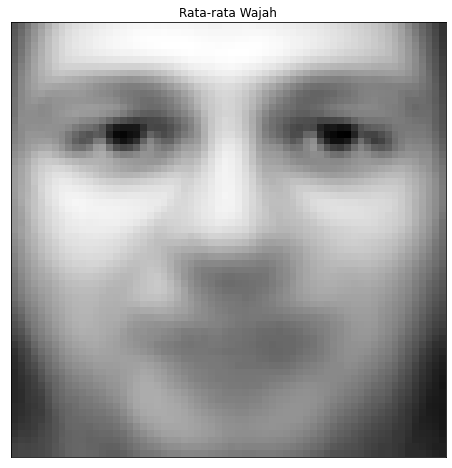

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (8, 8))
ax.imshow(pca.mean_.reshape((64, 64)), cmap = "gray")
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Rata-rata Wajah')

Text(0.5, 0.98, 'Eigen Faces')

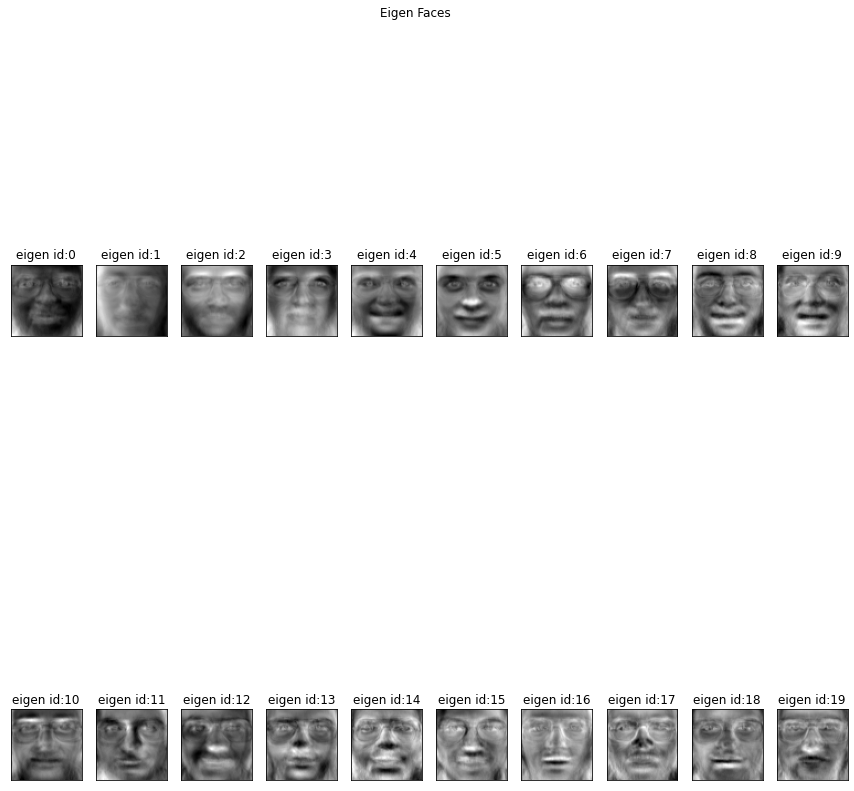

In [ ]:
number_of_eigenfaces = len(pca.components_)
eigen_faces = pca.components_.reshape((number_of_eigenfaces, data.shape[1], data.shape[2]))

cols = 10
rows = int(number_of_eigenfaces/cols)
fig, axarr = plt.subplots(nrows = rows, ncols = cols, figsize = (15, 15))
axarr=axarr.flatten()

for i in range(number_of_eigenfaces):
    axarr[i].imshow(eigen_faces[i],cmap = "gray")
    axarr[i].set_xticks([])
    axarr[i].set_yticks([])
    axarr[i].set_title("eigen id:{}".format(i))
plt.suptitle("Eigen Faces".format(10*"=", 10*"="))

In [ ]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

## **Linear SVC**

In [ ]:
svc = SVC(kernel = 'linear', gamma='auto')
svc.fit(X_train_pca, y_train)

SVC(gamma='auto', kernel='linear')

In [ ]:
y_svc = svc.predict(X_test_pca)

In [ ]:
from sklearn.metrics import accuracy_score

print("accuracy score : {:.2f}%".format(metrics.accuracy_score(y_test, y_svc) * 100))

accuracy score : 91.67%


### **One VS Rest (One VS All) Classifier**

In [ ]:
ovr = OneVsRestClassifier(svc)
ovr.fit(X_train_pca, y_train)

OneVsRestClassifier(estimator=SVC(gamma='auto', kernel='linear'))

In [ ]:
y_ovr = ovr.predict(X_test_pca)

In [ ]:
print("accuracy score : {:.2f}%".format(metrics.accuracy_score(y_test, y_ovr) * 100))

accuracy score : 89.17%


In [ ]:
print("Classification Results :\n{}".format(metrics.classification_report(y_test, y_ovr)))

Classification Results :
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       1.00      1.00      1.00         3
           2       0.67      0.67      0.67         3
           3       1.00      1.00      1.00         3
           4       1.00      0.67      0.80         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      0.67      0.80         3
           8       1.00      1.00      1.00         3
           9       0.67      0.67      0.67         3
          10       1.00      1.00      1.00         3
          11       1.00      0.67      0.80         3
          12       0.50      0.33      0.40         3
          13       1.00      1.00      1.00         3
          14       0.75      1.00      0.86         3
          15       1.00      1.00      1.00         3
          16       0.75      1.00      0.86         3
  

### **One VS One Classifier**

In [ ]:
ovo = OneVsOneClassifier(svc)
ovo.fit(X_train_pca, y_train)

OneVsOneClassifier(estimator=SVC(gamma='auto', kernel='linear'))

In [ ]:
y_ovo = ovo.predict(X_test_pca)

In [ ]:
print("accuracy score : {:.2f}%".format(metrics.accuracy_score(y_test, y_ovo) * 100))

accuracy score : 91.67%


In [ ]:
print("Classification Results :\n{}".format(metrics.classification_report(y_test, y_ovo)))

Classification Results :
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       1.00      1.00      1.00         3
           2       0.75      1.00      0.86         3
           3       0.75      1.00      0.86         3
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       0.67      0.67      0.67         3
           8       1.00      1.00      1.00         3
           9       1.00      0.67      0.80         3
          10       1.00      1.00      1.00         3
          11       1.00      0.67      0.80         3
          12       0.50      0.33      0.40         3
          13       1.00      1.00      1.00         3
          14       0.75      1.00      0.86         3
          15       1.00      1.00      1.00         3
          16       1.00      1.00      1.00         3
  

# **LDA**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.3, stratify = target, random_state = 0)
print("X_train shape :", X_train.shape)
print("y_train shape : {}".format(y_train.shape))

X_train shape : (280, 4096)
y_train shape : (280,)


In [ ]:
lda = LinearDiscriminantAnalysis(n_components = 39)
X_train_lda = lda.fit_transform(X_train, y_train)
y_pred = lda.predict(X_test)

X_test_lda = lda.transform(X_test)

## **Linear SVC**

In [ ]:
svc = SVC(kernel = 'linear', gamma='auto')
svc.fit(X_train_lda, y_train)

SVC(gamma='auto', kernel='linear')

In [ ]:
y_svc = svc.predict(X_test_lda)

In [ ]:
print("accuracy score : {:.2f}%".format(metrics.accuracy_score(y_test, y_svc) * 100))

accuracy score : 95.00%


### **One VS Rest (One VS All) Classifier**

In [ ]:
ovr = OneVsRestClassifier(svc)
ovr.fit(X_train_lda, y_train)

OneVsRestClassifier(estimator=SVC(gamma='auto', kernel='linear'))

In [ ]:
y_ovr = ovr.predict(X_test_lda)

In [ ]:
print("accuracy score : {:.2f}%".format(metrics.accuracy_score(y_test, y_ovr) * 100))

accuracy score : 95.00%


In [ ]:
print("Classification Results :\n{}".format(metrics.classification_report(y_test, y_ovr)))

Classification Results :
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       1.00      1.00      1.00         3
           2       0.60      1.00      0.75         3
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         3
           5       0.75      1.00      0.86         3
           6       1.00      1.00      1.00         3
           7       1.00      0.67      0.80         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       1.00      0.67      0.80         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         3
          16       1.00      1.00      1.00         3
  

### **One VS One Classifier**

In [ ]:
ovo = OneVsOneClassifier(svc)
ovo.fit(X_train_lda, y_train)

OneVsOneClassifier(estimator=SVC(gamma='auto', kernel='linear'))

In [ ]:
y_ovo = ovo.predict(X_test_lda)

In [ ]:
print("accuracy score : {:.2f}%".format(metrics.accuracy_score(y_test, y_ovo) * 100))

accuracy score : 95.00%


In [ ]:
print("Classification Results :\n{}".format(metrics.classification_report(y_test, y_ovo)))

Classification Results :
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       1.00      1.00      1.00         3
           2       0.60      1.00      0.75         3
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      0.67      0.80         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         3
          14       0.75      1.00      0.86         3
          15       1.00      1.00      1.00         3
          16       1.00      1.00      1.00         3
  